In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gopikachauhan18","key":"23d6f6f3a390326ec7c0e5210b463eaa"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!mkdir -p kaggle
!cp kaggle.json kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           8330        153  1.0              
jacopoferretti/incomes-of-30k-usa-citizens                    Incomes of 30K USA Citizens                        468KB  2024-11-17 00:16:20           1014         22  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                           22KB  2024-11-11 19:11:28           3830         53  1.0              
jakewright/200k-youtube-channel-analytics                     200k YouTube 

In [ ]:
!kaggle datasets download -d dinodev/majorplantdiseasedetection


Dataset URL: https://www.kaggle.com/datasets/dinodev/majorplantdiseasedetection
License(s): unknown
100% 1.55G/1.55G [00:52<00:00, 38.3MB/s]
100% 1.55G/1.55G [00:52<00:00, 31.4MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("majorplantdiseasedetection.zip", 'r') as zip_ref:
    zip_ref.extractall("majorplantdiseasedetection_data")


In [ ]:
import os
print(os.listdir())


['.config', 'kaggle', 'kaggle.json', 'majorplantdiseasedetection_data', 'majorplantdiseasedetection.zip', 'sample_data']


In [ ]:
!file majorplantdiseasedetection_data


majorplantdiseasedetection_data: directory


In [ ]:
import os
print(os.listdir('majorplantdiseasedetection_data'))


['dataset']


In [ ]:
import os
print(os.listdir('majorplantdiseasedetection_data/dataset/train'))


['Pepper,_bell___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Coffee__red spider mite', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Strawberry___Leaf_scorch', 'Chili__leaf spot', 'Tomato___Early_blight', 'Potato___healthy', 'Grape___Black_rot', 'Apple___Black_rot', 'Corn_(maize)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Apple_scab', 'Tomato___Bacterial_spot', 'Chili__whitefly', 'Cherry_(including_sour)___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Chili__yellowish', 'Coffee__Rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___healthy', 'Peach___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Pepper,_bell___healthy', 'Tomato___Tomato_mosaic_virus', 'Chili__healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Grape___healthy', 'Corn_(maize)___Common_rust_', 'Apple___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Leaf_M

In [ ]:
import os

folder = 'majorplantdiseasedetection_data/dataset/train'
images = os.listdir(folder)
print(f"Number of images: {len(images)}")
print(images[:5])  # Show the first 5 images


Number of images: 41
['Pepper,_bell___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Coffee__red spider mite', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    # Add other augmentation options if needed (e.g., rotation_range, shear_range, etc.)
)

train_dataset = train_datagen.flow_from_directory(
    'majorplantdiseasedetection_data/dataset/train',  # Replace with the actual path
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

Found 33111 images belonging to 41 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import classification_report
import time

In [ ]:
import os

directory = 'majorplantdiseasedetection_data/dataset/train'
contents = os.listdir(directory)
num_of_dirs = len([name for name in contents if os.path.isdir(os.path.join(directory, name))])

print("Contents of the directory:")
for item in contents:
    print(item)

print(f"\nNumber of directories: {num_of_dirs}")

Contents of the directory:
Pepper,_bell___Bacterial_spot
Grape___Esca_(Black_Measles)
Coffee__red spider mite
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Potato___Early_blight
Strawberry___Leaf_scorch
Chili__leaf spot
Tomato___Early_blight
Potato___healthy
Grape___Black_rot
Apple___Black_rot
Corn_(maize)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Apple___Apple_scab
Tomato___Bacterial_spot
Chili__whitefly
Cherry_(including_sour)___healthy
Potato___Late_blight
Strawberry___healthy
Chili__yellowish
Coffee__Rust
Corn_(maize)___Northern_Leaf_Blight
Tomato___healthy
Peach___healthy
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Late_blight
Pepper,_bell___healthy
Tomato___Tomato_mosaic_virus
Chili__healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Peach___Bacterial_spot
Tomato___Target_Spot
Grape___healthy
Corn_(maize)___Common_rust_
Apple___healthy
Apple___Cedar_apple_rust
Tomato___Leaf_Mold
Cherry_(including_sour)___Powdery_mildew
Tomato___Septoria_leaf_spot
Coffee__he

In [ ]:
from PIL import Image
import os

# Define the directory path
directory_path = 'majorplantdiseasedetection_data/dataset/train'

# List all files in the directory
file_names = os.listdir(directory_path)

# Load images from the directory
images = []
for file_name in file_names:
    if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
        image_path = os.path.join(directory_path, file_name)
        image = Image.open(image_path)
        images.append(image)
# Process the images as required
# ...

# Example: Showing the first image
if images:
    images[0].show()
else:
    print("No images found in the directory.")

No images found in the directory.


In [ ]:
# Define parameters
batch_size = 128
num_epochs = 40
image_size = (139, 139)
num_classes = 41

In [ ]:
# Load the InceptionV3 model
image_input = Input(shape=(*image_size, 3))
inception_model = InceptionV3(input_tensor=image_input, weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Add a new classification layer
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
class_outputs = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the model
model = Model(inputs=inception_model.input, outputs=class_outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Load the training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_dataset = train_datagen.flow_from_directory(
    'majorplantdiseasedetection_data/dataset/train',
    target_size=(139, 139),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the validation data
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_dataset = val_datagen.flow_from_directory(
    'majorplantdiseasedetection_data/dataset/train',
    target_size=(139,139),
    batch_size=batch_size,
    class_mode='categorical'
)
# Train the model and store the history
history = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset)

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    'majorplantdiseasedetection_data/dataset/test',
    target_size=(139,139),
    batch_size=batch_size,
    class_mode='categorical'
)

# Save the model
model.save('plant_disease_model_inception.h5')

Found 33111 images belonging to 41 classes.
Found 33111 images belonging to 41 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


259/259 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.6462 - loss: 1.3976 - val_accuracy: 0.5199 - val_loss: 3.0585
Epoch 2/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.9025 - loss: 0.3644 - val_accuracy: 0.7019 - val_loss: 1.4923
Epoch 3/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9230 - loss: 0.2737 - val_accuracy: 0.8084 - val_loss: 0.7854
Epoch 4/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.9417 - loss: 0.2084 - val_accuracy: 0.8245 - val_loss: 0.9649
Epoch 5/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9485 - loss: 0.1768 - val_accuracy: 0.7715 - val_loss: 0.9467
Epoch 6/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.9552 - loss: 0.1558 - val_accuracy: 0.7897 - val_loss: 1.0703
Epoch 7/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9585 - loss: 0.1406 - val_accuracy: 0.8619 - val_loss: 0.5175
Epoch 8/40
259/259 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.9623 - loss: 0.1284 - val_accuracy: 0.881

In [ ]:
 #Save the model in native Keras format
model.save('plant_disease_model_inception.keras')

import joblib

# Save the model using joblib
joblib.dump(model, 'plant_disease_model_inception.pkl')


['plant_disease_model_inception.pkl']

In [ ]:
# Save model weights
model.save_weights('.weights.h5')

# Save model configurations (architecture, optimizer state, etc.)
model_config = model.get_config()
with open('model_config.pkl', 'wb') as config_file:
    joblib.dump(model_config, config_file)

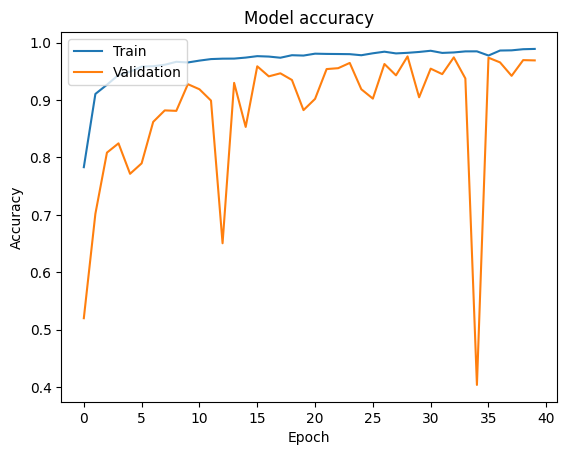

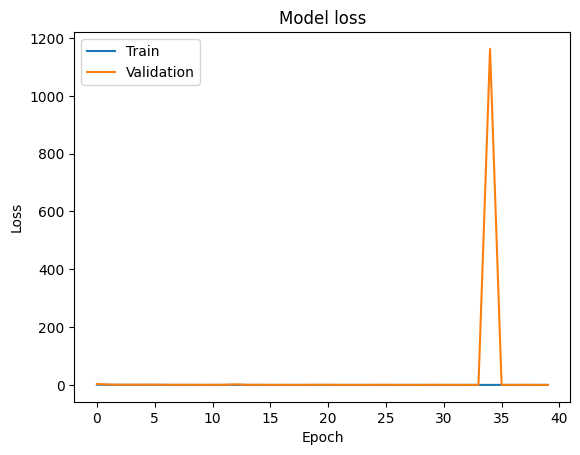

In [ ]:
# Plot the metrics to visualize the training process
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_metrics(history)

In [ ]:
# Load the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    'majorplantdiseasedetection_data/dataset/test',
    target_size=(139, 139),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain the order for evaluation
)

# Evaluate the model on the test data
start_time = time.time()
evaluation_result = model.evaluate(test_dataset)
print("Time taken to evaluate the model: " + str(time.time() - start_time))

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

# Make predictions on the test set
y_pred = model.predict(test_dataset)
y_pred_bool = np.argmax(y_pred, axis=1)

# Get true labels directly from test_dataset
true_labels = test_dataset.labels

# Print the classification report
print(classification_report(true_labels, y_pred_bool, digits=4))

# Optionally, you can save the evaluation results for further analysis
np.savetxt("y_true.txt", true_labels, fmt="%d")
np.savetxt("y_pred.txt", y_pred_bool, fmt="%d")

Found 8339 images belonging to 41 classes.
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 439ms/step - accuracy: 0.9274 - loss: 0.3683
Time taken to evaluate the model: 41.25808620452881
Test Loss: 0.24915723502635956
Test Accuracy: 0.9463964700698853
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 429ms/step
              precision    recall  f1-score   support

           0     1.0000    0.9841    0.9920       126
           1     1.0000    0.8468    0.9170       124
           2     1.0000    0.9455    0.9720        55
           3     0.9907    0.9696    0.9800       329
           4     0.9952    0.9952    0.9952       210
           5     0.9548    0.9941    0.9741       170
           6     1.0000    0.5000    0.6667        10
           7     0.3333    0.3000    0.3158        10
           8     0.8000    0.8000    0.8000        10
           9     0.7273    0.8000    0.7619        10
          10     0.7143    1.0000    0.8333        10
          11     0.6406    0.3534    0.4556       116
          12     0.